In [7]:
!pip install pandas



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install pandas



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Pandas adalah pustaka Python yang sangat populer untuk manipulasi data dan analisis data. Pustaka ini menyediakan struktur data yang fleksibel dan efisien untuk bekerja dengan data berbentuk tabel (seperti spreadsheet atau database) menggunakan DataFrame dan Series.

In [9]:
import pandas as pd
import numpy as np 

pandas : Perintah ini mengimpor pustaka pandas ke dalam program Python dan menetapkan alias pd untuk digunakan sebagai referensi singkat.

numpy : Perintah ini mengimpor pustaka NumPy ke dalam program Python dan menetapkan alias np untuk digunakan sebagai referensi singkat.

DATA LOADING

In [10]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.sample()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
22897,Male,16.0,0,0,never,21.53,4.5,145,0


DATA CLEANING

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [12]:
print("\nJumlah Data Hilang per Kolom:\n", df.isnull().sum()) 


Jumlah Data Hilang per Kolom:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [13]:
print("\nBaris Terduplikat:\n", df[df.duplicated()])


Baris Terduplikat:
        gender   age  hypertension  heart_disease smoking_history    bmi  \
2756     Male  80.0             0              0         No Info  27.32   
3272   Female  80.0             0              0         No Info  27.32   
3418   Female  19.0             0              0         No Info  27.32   
3939   Female  78.0             1              0          former  27.32   
3960     Male  47.0             0              0         No Info  27.32   
...       ...   ...           ...            ...             ...    ...   
99980  Female  52.0             0              0           never  27.32   
99985    Male  25.0             0              0         No Info  27.32   
99989  Female  26.0             0              0         No Info  27.32   
99990    Male  39.0             0              0         No Info  27.32   
99995  Female  80.0             0              0         No Info  27.32   

       HbA1c_level  blood_glucose_level  diabetes  
2756           6.6        

In [14]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype == "float64":  # Numerikal kontinu
        numerical.append(col)
    elif df[col].dtype == "int64" and col not in ['bmi', 'HbA1c_level']:  # Integer tertentu dianggap numerikal
        numerical.append(col)
    else:  # Selain itu dianggap kategorikal
        catgcols.append(col)
for col in df.columns:
    if col in numerical:  # Untuk numerikal
        df[col].fillna(df[col].median(), inplace=True)
    else:  # Untuk kategorikal
        df[col].fillna(df[col].mode()[0], inplace=True)



C:\Users\Acer\AppData\Local\Temp\ipykernel_12652\3131694370.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_12652\3131694370.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [15]:
numerical

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [16]:
catgcols

['gender', 'smoking_history']

In [17]:
df['diabetes'].value_counts()


diabetes
0    91500
1     8500
Name: count, dtype: int64

In [18]:
fitur = [col for col in df.columns if col != 'diabetes']
target = 'diabetes'

In [19]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [20]:
df[fitur].value_counts()

gender  age    hypertension  heart_disease  smoking_history  bmi    HbA1c_level  blood_glucose_level
Female  80.00  0             0              No Info          27.32  6.5          159                    10
                                                                    6.2          90                      9
                                                                    4.0          85                      8
                                                                    4.5          140                     7
                                                                    4.0          160                     7
                                                                                                        ..
Male    80.00  1             1              not current      29.30  5.8          100                     1
                                                             34.24  6.2          140                     1
                                           

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
for col in catgcols:
    df[col] = le.fit_transform(df[col])

df['diabetes'] = le.fit_transform(df['diabetes'])

EDA

In [17]:
le = LabelEncoder()
df['Encoded'] = le.fit_transform(df['diabetes'])

# Memeriksa apakah ada nilai hilang di kolom hasil encoding
missing_values = df['Encoded'].isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

print("Jumlah nilai hilang setelah encoding:", missing_values)
print("Persentase nilai hilang setelah encoding:", missing_percentage)

Jumlah nilai hilang setelah encoding: 0
Persentase nilai hilang setelah encoding: 0.0


In [23]:
x = df[fitur]
y = df[target]

In [24]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [23]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [24]:
df.to_csv('diabetes_clean.csv')

In [26]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


SMOTE (Synthetic Minority Over-sampling Technique) adalah teknik dalam imbalanced-learn library untuk mengatasi masalah dataset yang tidak seimbang. Oversampling (Over-sampling) adalah teknik untuk meningkatkan jumlah sampel dari kelas minor

Matplotlib merupakan sebuah library Python yang reliable dan komprehensif untuk mendukung kebutuhan pembuatan visualisasi data.

Seaborn adalah pustaka visualisasi data berbasis Matplotlib, tetapi dengan tampilan yang lebih menarik dan fungsi tingkat tinggi.


DATA SPLITTING

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [28]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='diabetes', ylabel='Count'>

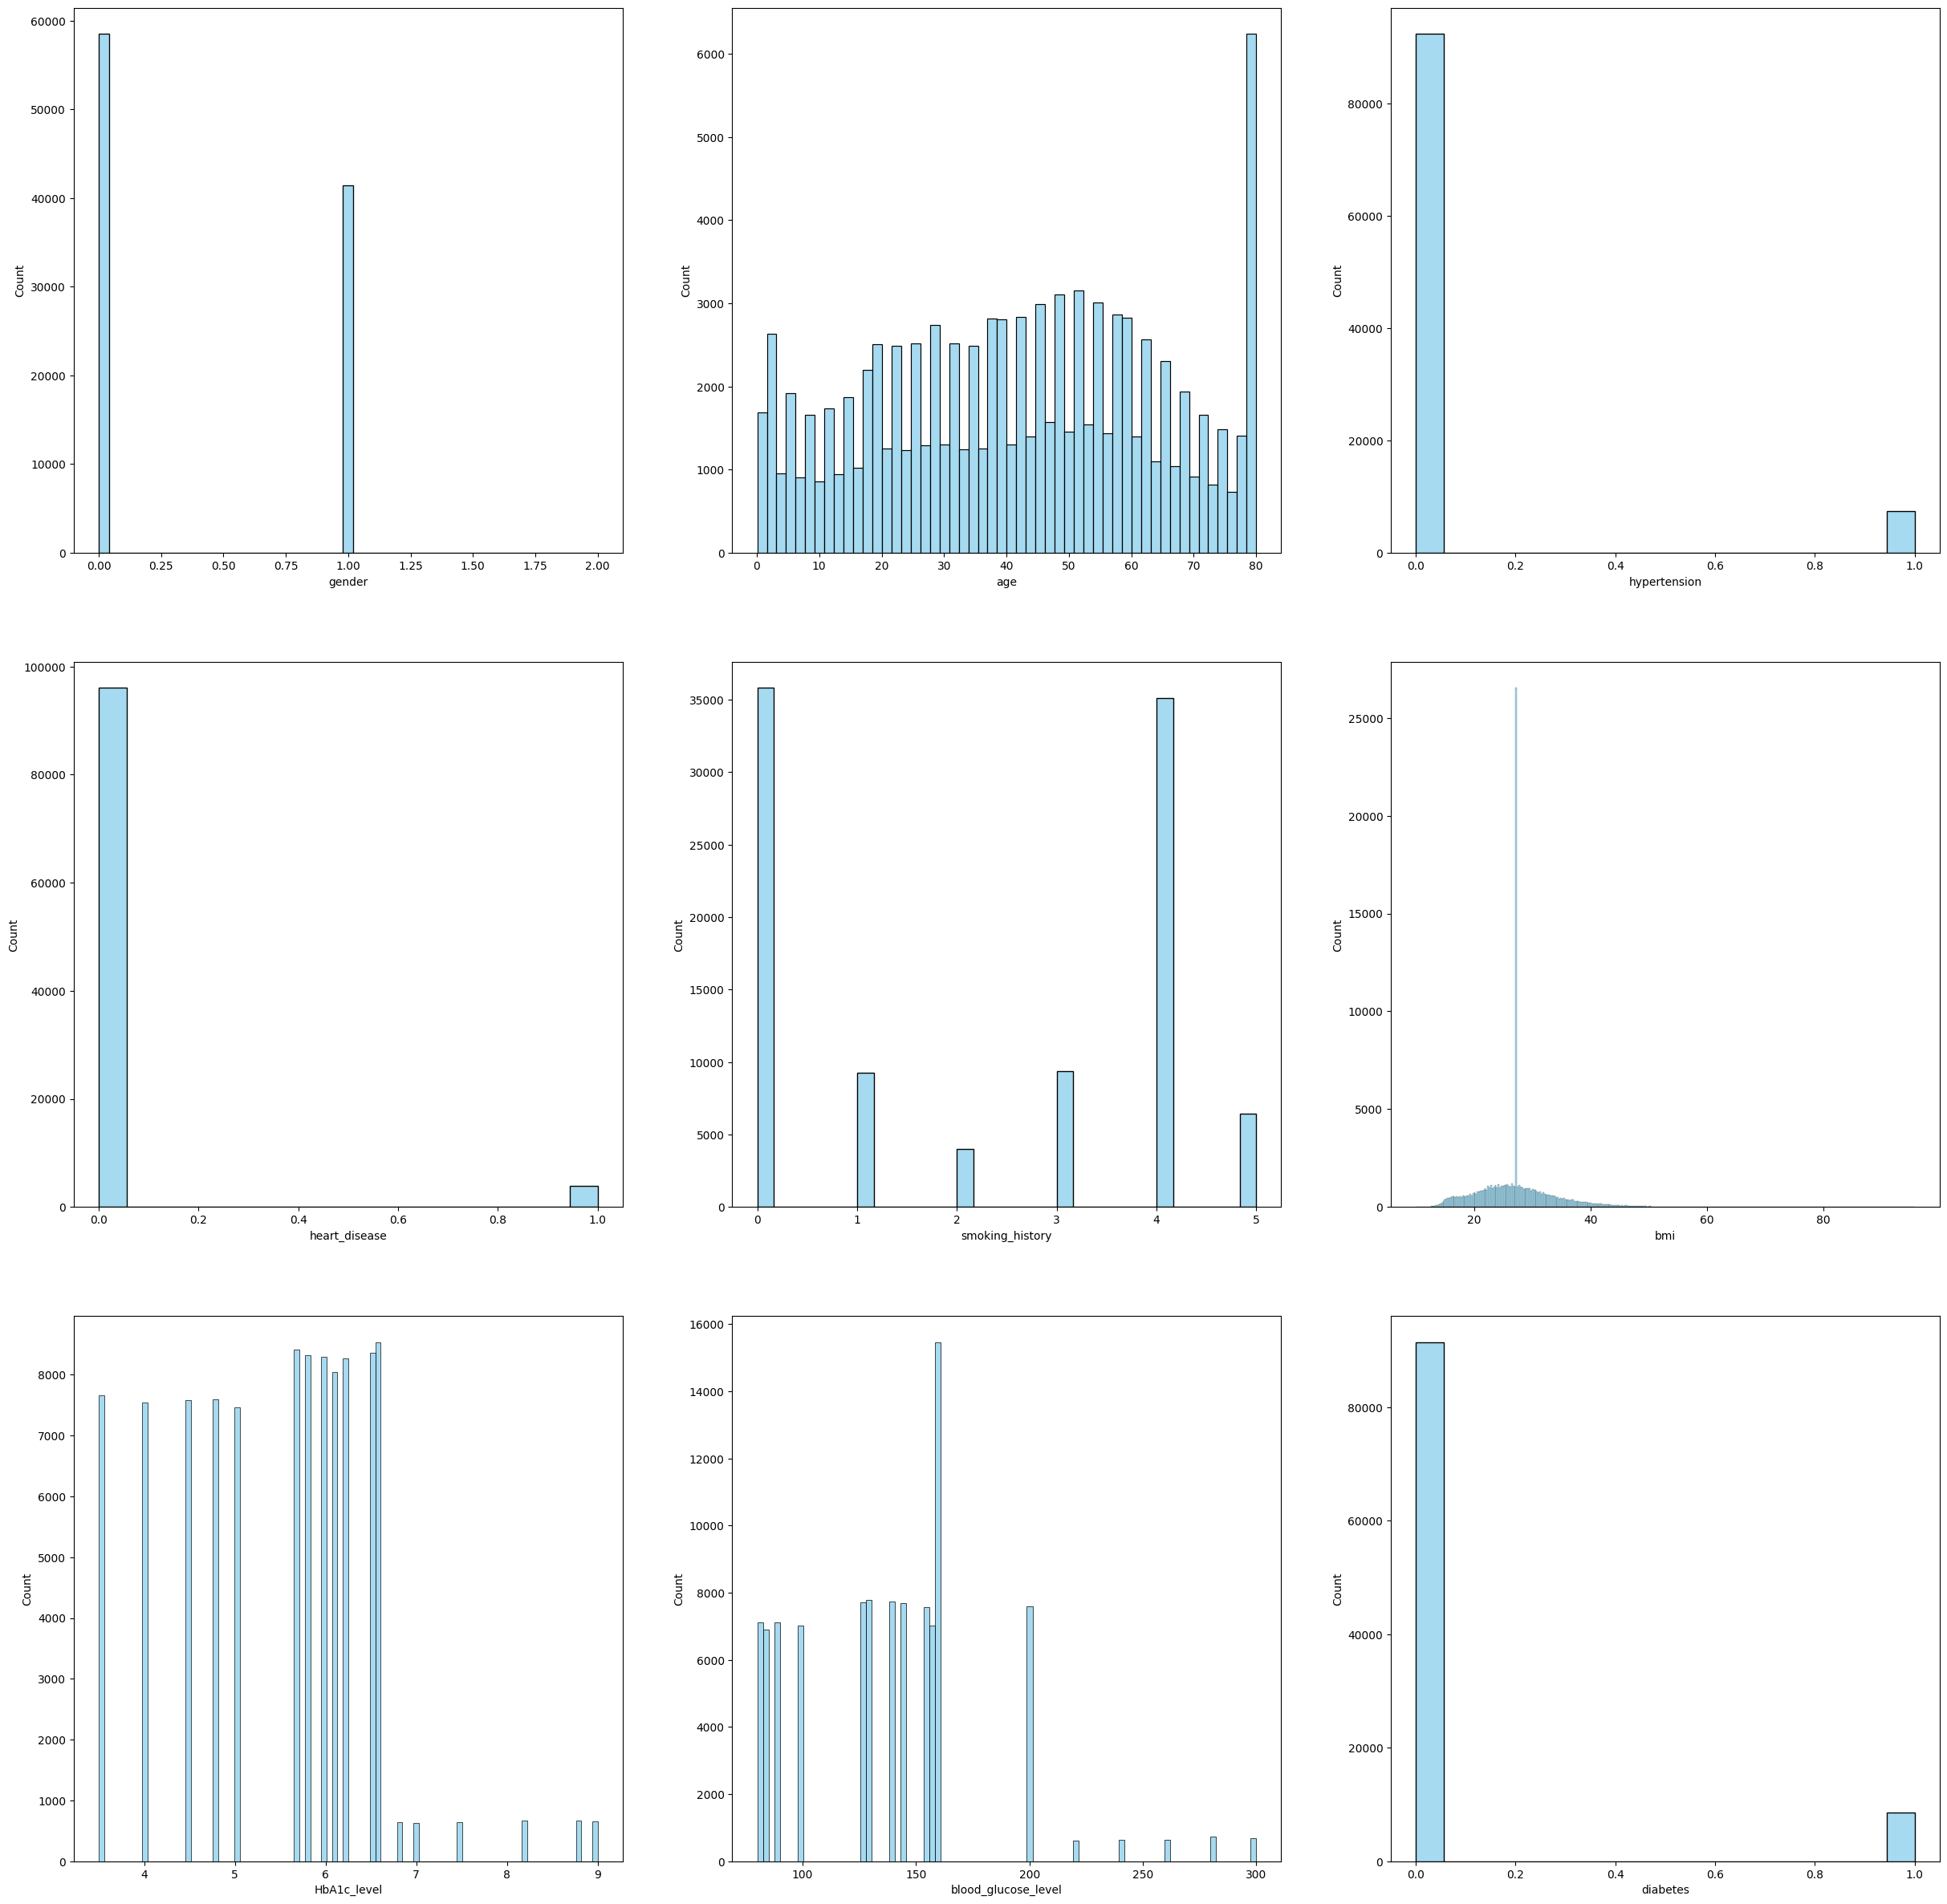

In [29]:

fig, axes = plt.subplots(3, 3, figsize=(30, 30 ))  # Ukuran lebih besar untuk tampilan vertikal


sns.histplot(data=df, x='gender', ax=axes[0, 0], color='skyblue')
sns.histplot(data=df, x='age', ax=axes[0, 1], color='skyblue')
sns.histplot(data=df, x='hypertension', ax=axes[0, 2], color='skyblue')
sns.histplot(data=df, x='heart_disease', ax=axes[1, 0], color='skyblue')
sns.histplot(data=df, x='smoking_history', ax=axes[1, 1], color='skyblue')
sns.histplot(data=df, x='bmi', ax=axes[1, 2], color='skyblue')
sns.histplot(data=df, x='HbA1c_level', ax=axes[2, 0], color='skyblue')
sns.histplot(data=df, x='blood_glucose_level', ax=axes[2, 1], color='skyblue')
sns.histplot(data=df, x='diabetes', ax=axes[2, 2], color='skyblue')

In [41]:
from collections import Counter

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

# Periksa distribusi awal
print("Distribusi Sebelum SMOTE:", Counter(y))

# Periksa distribusi setelah SMOTE
print("Distribusi Setelah SMOTE:", Counter(y_resampled))

# Membagi data setelah SMOTE menjadi train dan test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Tampilkan distribusi data pelatihan dan pengujian
print("Distribusi y_train Setelah Splitting:", Counter(y_train))
print("Distribusi y_test Setelah Splitting:", Counter(y_test))



Distribusi Sebelum SMOTE: Counter({0: 91500, 1: 8500})
Distribusi Setelah SMOTE: Counter({0: 91500, 1: 91500})
Distribusi y_train Setelah Splitting: Counter({0: 64131, 1: 63969})
Distribusi y_test Setelah Splitting: Counter({1: 27531, 0: 27369})


<function matplotlib.pyplot.show(close=None, block=None)>

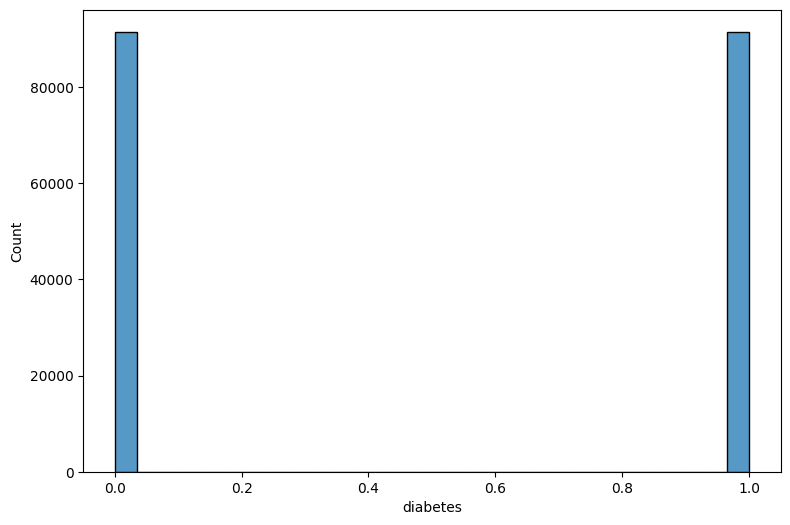

In [43]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_resampled)
plt.show

DATA MODEL (RANDOM FOREST)

In [44]:
rfc = RandomForestClassifier(
    n_estimators=100,            # Jumlah pohon yang digunakan, biasanya lebih besar dari Decision Tree
    criterion='entropy',         # Kriteria pemisahan, setara dengan Decision Tree
    max_depth=None,                 # Kedalaman maksimum pohon
    max_features='sqrt',           # Menggunakan semua fitur untuk setiap pohon
    max_leaf_nodes=None,         # Tidak ada pembatasan pada jumlah daun
    min_samples_split=2,         # Sama dengan DTC, minimum sampel untuk membagi pohon
    min_samples_leaf=1,          # Sama dengan DTC, minimum sampel di setiap daun
    random_state=42,             # Random state untuk memastikan hasil yang konsisten
)

In [45]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [46]:
y_pred = rfc.predict(X_test)

In [48]:
cm = [[0, 0], [0, 0]]  # Inisialisasi matriks 2x2
for true, pred in zip(y_test, y_pred):
    if true == 0 and pred == 0:
        cm[0][0] += 1  # True Negative
    elif true == 0 and pred == 1:
        cm[0][1] += 1  # False Positive
    elif true == 1 and pred == 0:
        cm[1][0] += 1  # False Negative
    elif true == 1 and pred == 1:
        cm[1][1] += 1  # True Positive

tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

# 5. Hitung metrik evaluasi manual
accuracy = (tp + tn) / (tp + tn + fp + fn)  # Tidak ada pengecekan jika pembagi adalah 0
recall = tp / (tp + fn)  # Bisa menghasilkan error jika (tp + fn) = 0
specificity = tn / (tn + fp)  # Bisa menghasilkan error jika (tn + fp) = 0
precision = tp / (tp + fp)  # Bisa menghasilkan error jika (tp + fp) = 0
f1_score = 2 * (precision * recall) / (precision + recall)  

# 6. Cetak hasil
print("Confusion Matrix:")
print(f"[[{tn} {fp}]")
print(f" [{fn} {tp}]]")
print(f"Accuracy    : {accuracy * 100:.2f}%")
print(f"Recall      : {recall * 100:.2f}%")
print(f"Specificity : {specificity * 100:.2f}%")
print(f"Precision   : {precision * 100:.2f}%")
print(f"F1-Score    : {f1_score * 100:.2f}%")


Confusion Matrix:
[[26657 712]
 [745 26786]]
Accuracy    : 97.35%
Recall      : 97.29%
Specificity : 97.40%
Precision   : 97.41%
F1-Score    : 97.35%


DEPLOYMENT

In [147]:
import pickle

In [156]:
pickle.dump(rfc, open("rfc_.pkl", "wb"))

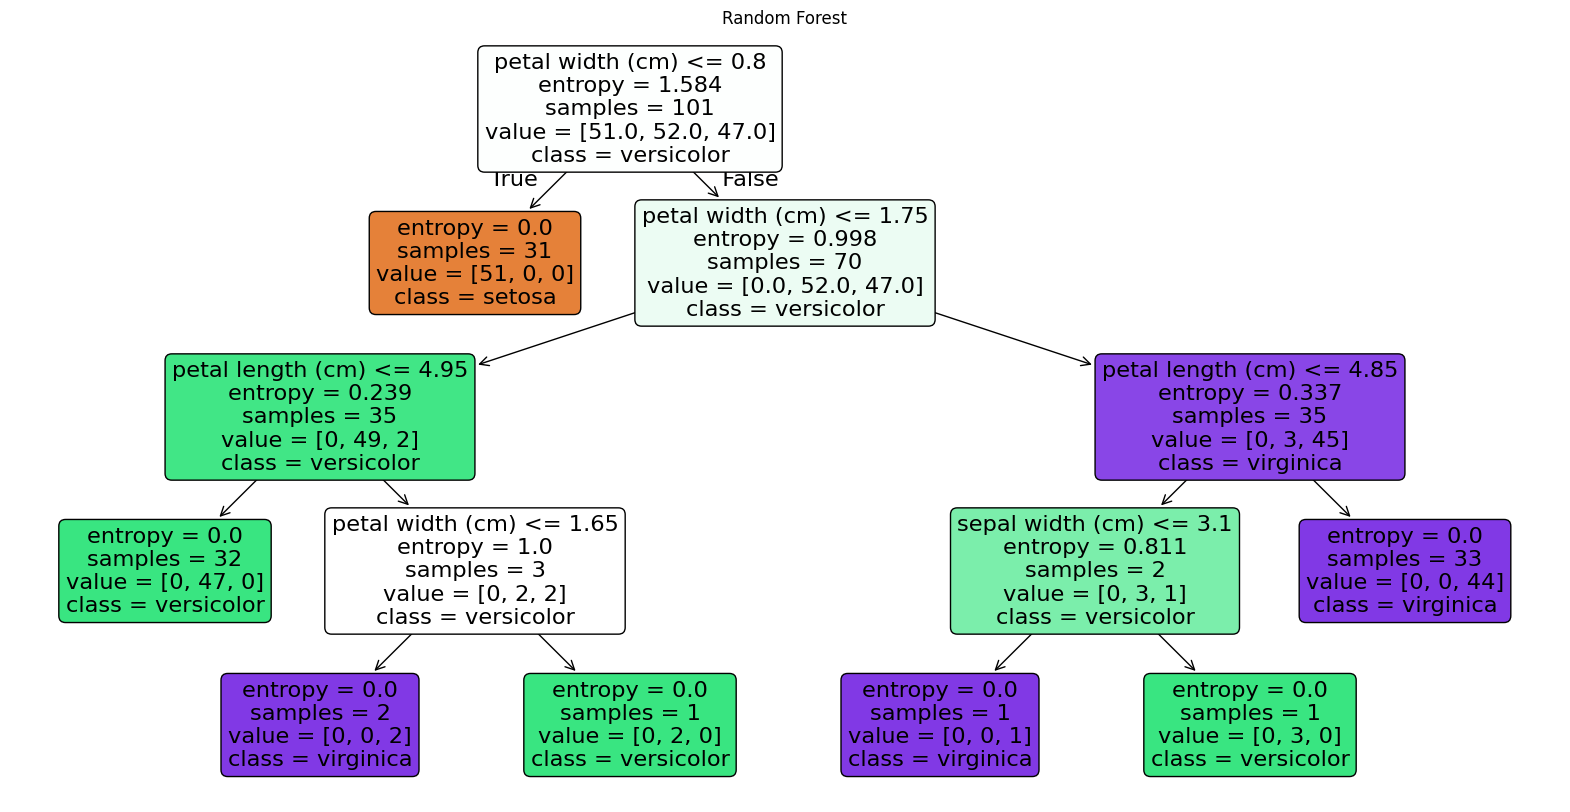

In [106]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree

# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Latih RandomForest
rfc = RandomForestClassifier( n_estimators=100,            # Jumlah pohon yang digunakan, biasanya lebih besar dari Decision Tree
    criterion='entropy',         # Kriteria pemisahan, setara dengan Decision Tree
    max_depth=None,                 # Kedalaman maksimum pohon
    max_features='sqrt',           # Menggunakan semua fitur untuk setiap pohon
    max_leaf_nodes=None,         # Tidak ada pembatasan pada jumlah daun
    min_samples_split=2,         # Sama dengan DTC, minimum sampel untuk membagi pohon
    min_samples_leaf=1,          # Sama dengan DTC, minimum sampel di setiap daun
    random_state=42, )
rfc.fit(X, y)

# Pilih salah satu pohon dari RandomForest (misalnya pohon pertama)
tree = rfc.estimators_[0]

# Visualisasikan pohon tersebut
plt.figure(figsize=(20,10))
plot_tree(tree, 
          feature_names=iris.feature_names,  # Gunakan nama fitur dari dataset
          class_names=iris.target_names,  # Gunakan nama kelas (species) dari dataset
          filled=True,                     # Warna untuk node
          rounded=True)                    # Membuat sudut node lebih bulat
plt.title("Random Forest")
plt.show()


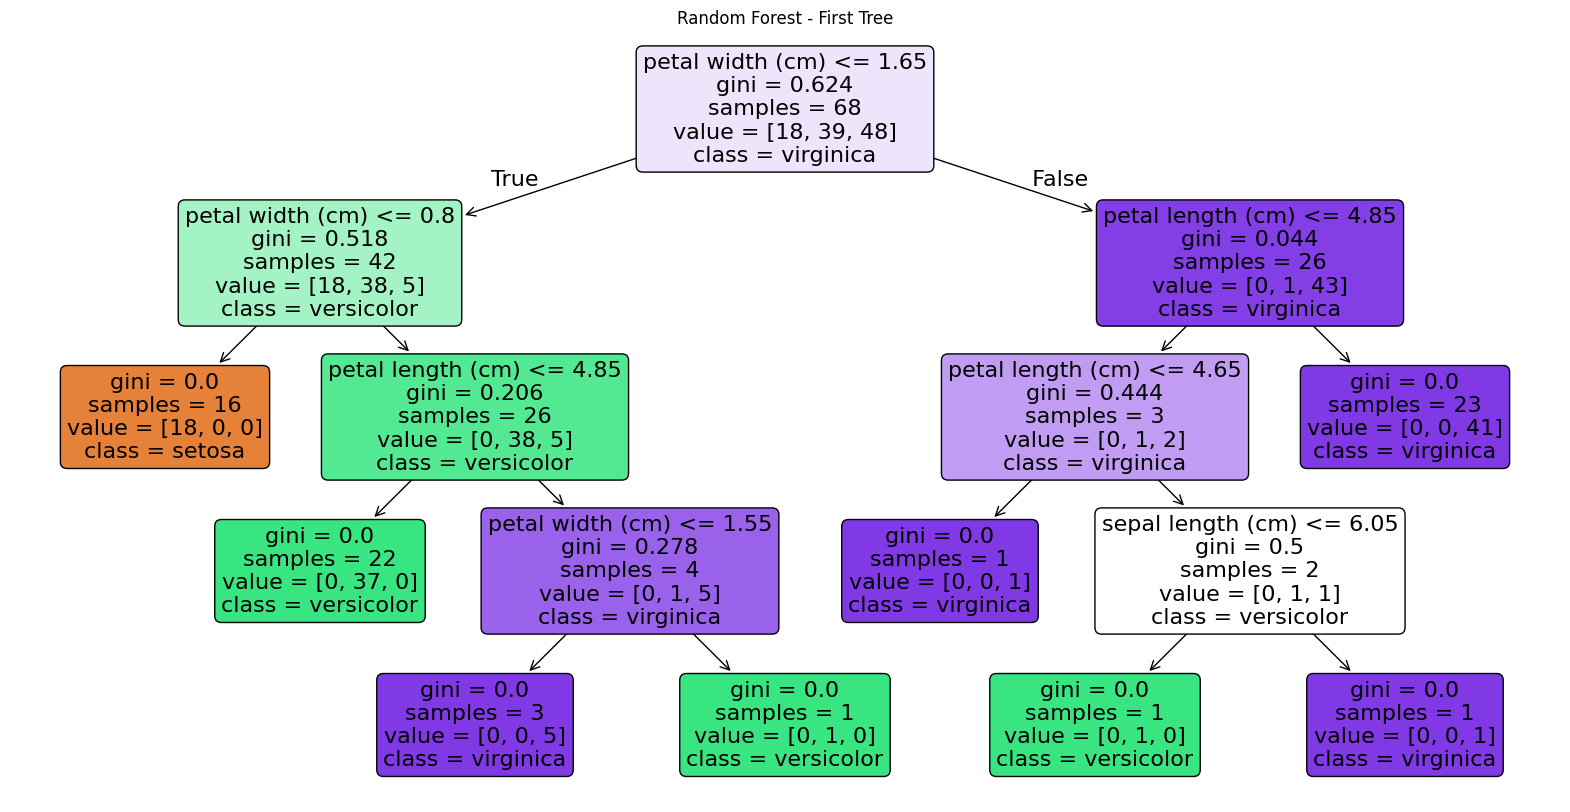

In [104]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Select one tree from the random forest (for example, the first tree)
tree = rfc.estimators_[0]

# Visualize the selected tree
plt.figure(figsize=(20,10))
plot_tree(tree, 
          feature_names=iris.feature_names,  # Use feature names from the dataset
          class_names=iris.target_names,     # Use class names from the dataset
          filled=True,                       # Fill nodes with colors for better visualization
          rounded=True)                      # Rounded corners for nodes
plt.title("Random Forest - First Tree")
plt.show()


In [101]:
!pip install graphviz

from sklearn.tree import export_graphviz
import graphviz

# Assuming rf_classifier is already trained
# Select one tree from the random forest (e.g., the first one)
tree = rfc.estimators_[0]

# Export the selected tree to DOT format
dot_file_path = "random_forest_tree.dot"
export_graphviz(
    tree, 
    out_file=dot_file_path, 
    feature_names=x,  # Feature names from the Iris dataset
    class_names=y,  # Class names (setosa, versicolor, virginica)
    filled=True,  # Color the nodes
    rounded=True,  # Rounded corners for nodes
    special_characters=True  # Allows special characters in labels
)

with open(dot_file_path) as f:
    dot_graph = f.read()

# Visualize the tree using graphviz
graph = graphviz.Source(dot_graph)
graph.render("random_forest_tree")
graph  # Display the tree graph



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ValueError: Length of feature_names, 100000 does not match number of features, 4

In [97]:
import pandas as pd

# Mengambil pentingnya fitur dari model
importances = rfc.feature_importances_

# Menyimpan nama fitur (misalnya, nama kolom data pelatihan Anda) dan pentingnya fitur
feature_names = ['gender', 'umur', 'hipertensi', 'penyakit_jantung', 'riwayat_merokok', 'bmi', 'hba1c', 'gula_darah']
feature_data = {'Feature': feature_names, 'Importance': importances}

# Membuat DataFrame dan menyimpannya sebagai CSV
df = pd.DataFrame(feature_data)
df.to_csv("feature_importances.csv", index=False)

In [81]:
from sklearn.tree import DecisionTreeClassifier

# Sekarang Anda bisa menggunakan DecisionTreeClassifier
dtc = DecisionTreeClassifier(
    criterion='entropy',          # Kriteria pemisahan, bisa 'gini' atau 'entropy'
    max_depth=None,               # Kedalaman maksimum pohon, jika None berarti tidak dibatasi
    max_features='sqrt',          # Menggunakan semua fitur untuk setiap pohon
    min_samples_split=2,          # Minimum sampel untuk membagi pohon
    min_samples_leaf=1,           # Minimum sampel di setiap daun
    random_state=42,
    splitter='best'              # Menentukan nilai random state agar hasil konsisten
)

# Lanjutkan dengan melatih model dan evaluasi
dtc.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       random_state=42)

In [82]:
y_pred = dtc.predict(X_test)

In [84]:
# Import library
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


# 5. Hitung Confusion Matrix (menggunakan class 0 sebagai contoh untuk binary metrics)
tn, fp, fn, tp = confusion_matrix((y_test).astype(int), (y_pred).astype(int)).ravel()

# 6. Hitung metrik evaluasi manual
accuracy = (tp + tn) / (tp + tn + fp + fn)  # Tidak ada pengecekan jika pembagi adalah 0
recall = tp / (tp + fn)  # Bisa menghasilkan error jika (tp + fn) = 0
specificity = tn / (tn + fp)  # Bisa menghasilkan error jika (tn + fp) = 0
precision = tp / (tp + fp)  # Bisa menghasilkan error jika (tp + fp) = 0
f1_score = 2 * (precision * recall) / (precision + recall)  

# 7. Cetak hasil dalam persentase
print("Confusion Matrix:")
print(f"[[{tn} {fp}]")
print(f" [{fn} {tp}]]")
print(f"Accuracy    : {accuracy * 100:.2f}%")
print(f"Recall      : {recall * 100:.2f}%")
print(f"Specificity : {specificity * 100:.2f}%")
print(f"Precision   : {precision * 100:.2f}%")
print(f"F1-Score    : {f1_score * 100:.2f}%")


Confusion Matrix:
[[26016 1353]
 [1348 26183]]
Accuracy    : 95.08%
Recall      : 95.10%
Specificity : 95.06%
Precision   : 95.09%
F1-Score    : 95.10%


In [86]:
# 1. Import library untuk visualisasi
from sklearn import tree
text_representation = tree.export_text(dtc)
print(text_representation)


|--- feature_4 <= 0.50
|   |--- feature_6 <= 6.60
|   |   |--- feature_1 <= 42.00
|   |   |   |--- feature_7 <= 210.00
|   |   |   |   |--- feature_6 <= 5.70
|   |   |   |   |   |--- feature_6 <= 5.35
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  5.35
|   |   |   |   |   |   |--- feature_1 <= 22.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_1 >  22.50
|   |   |   |   |   |   |   |--- feature_1 <= 27.50
|   |   |   |   |   |   |   |   |--- feature_7 <= 128.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_7 >  128.00
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 27.42
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 25.09
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  25.09
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   | 

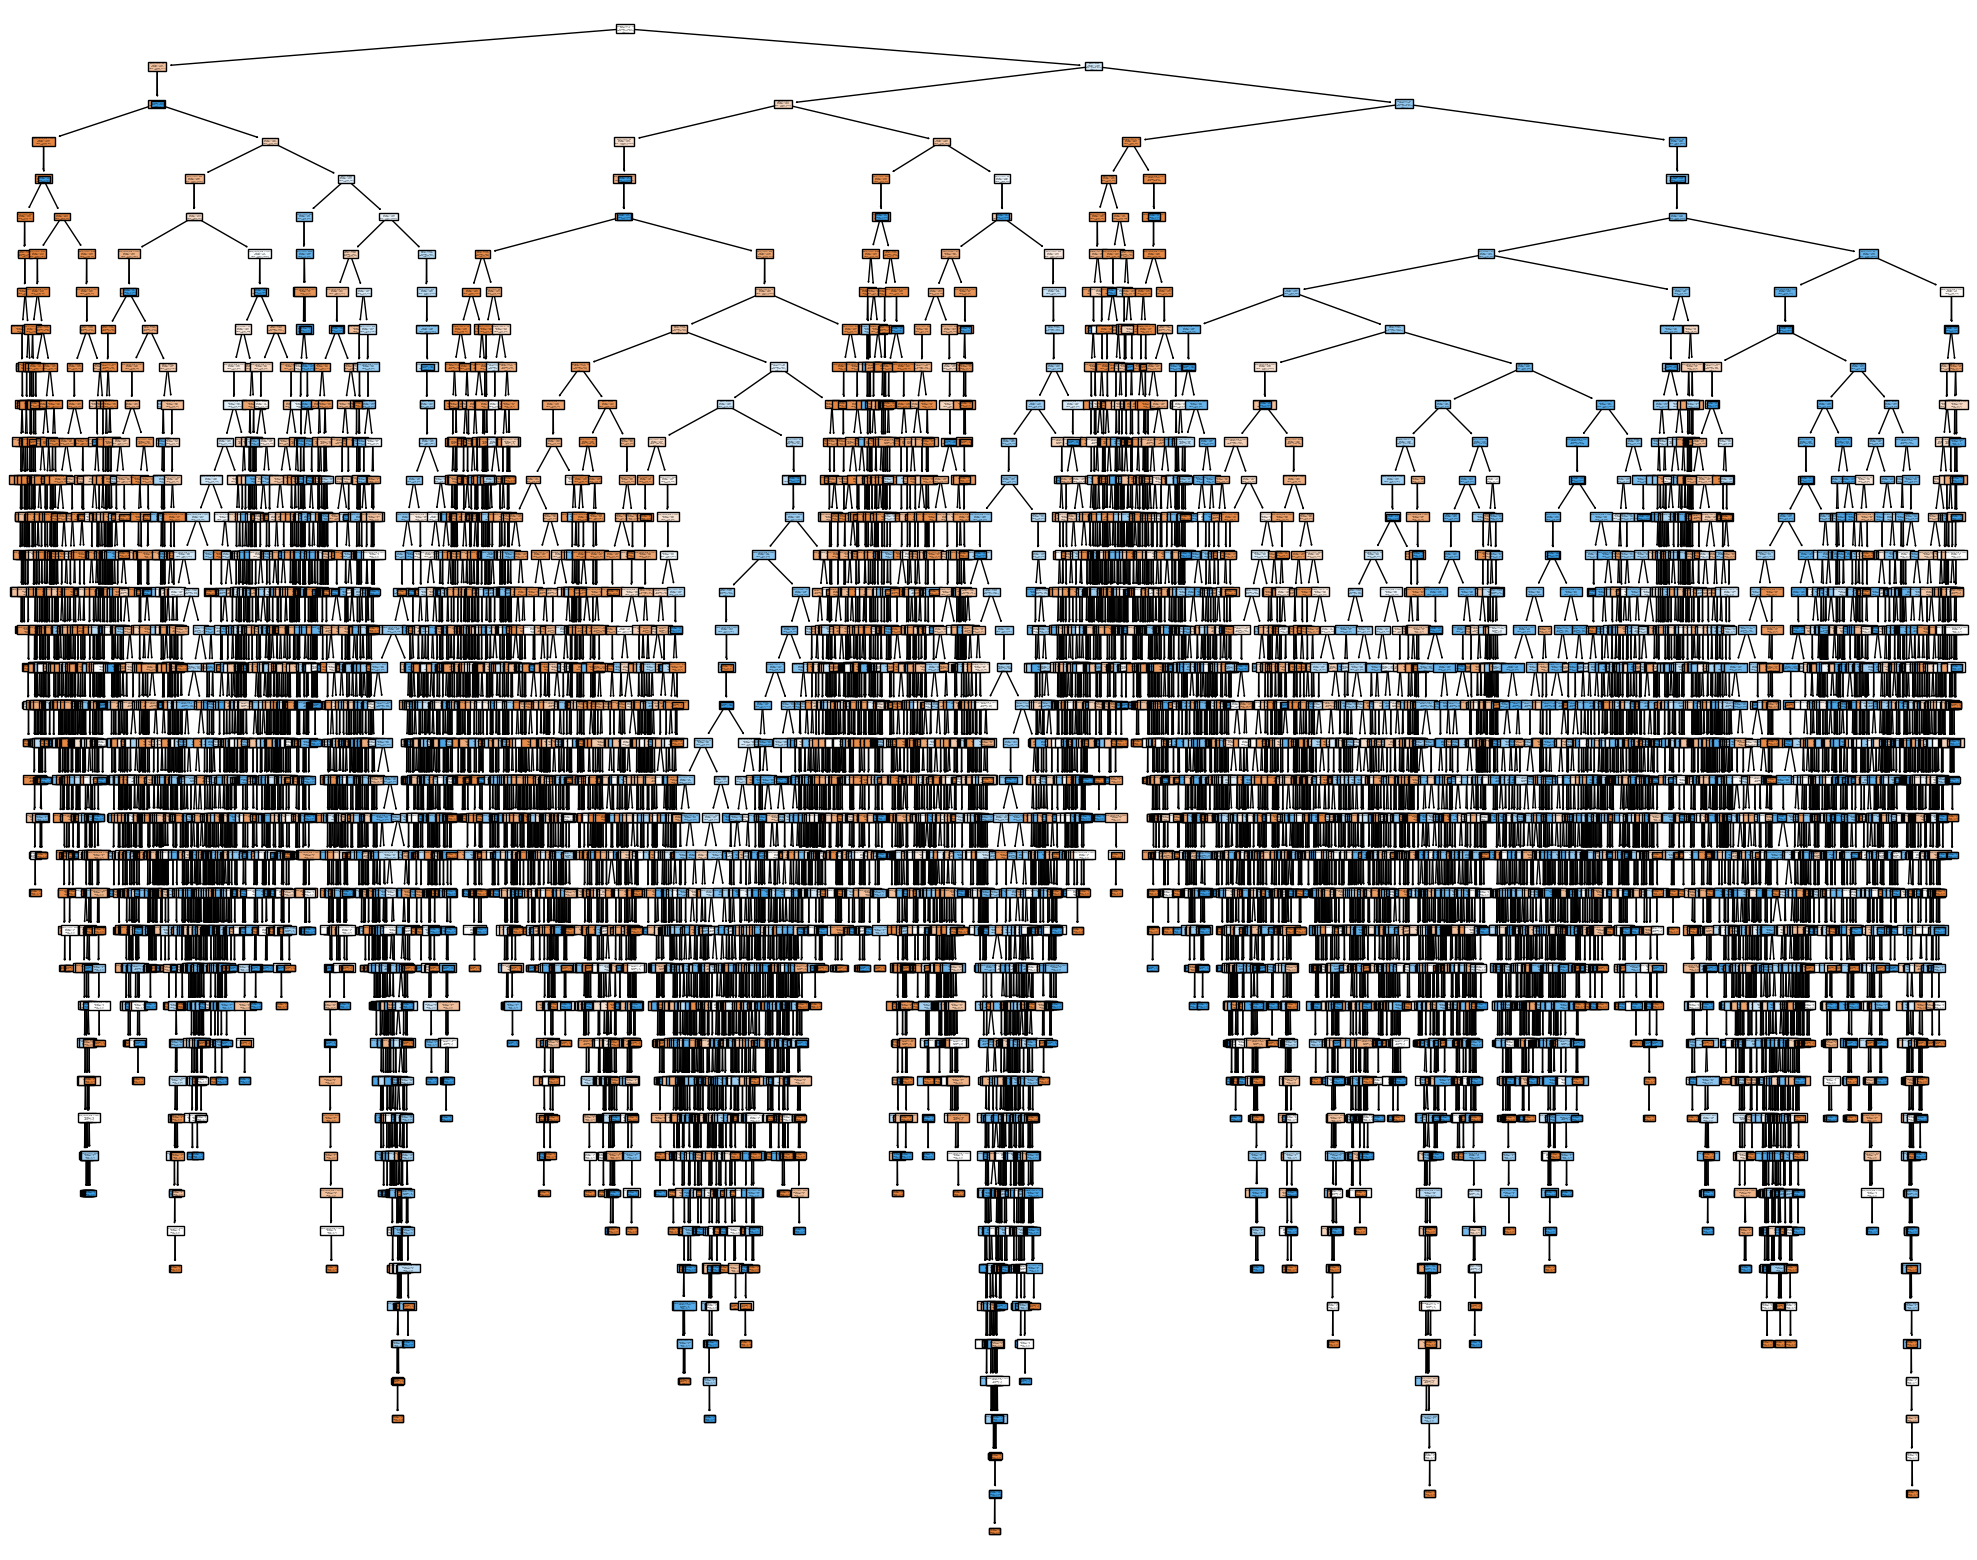

In [89]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc,
                   feature_names=x.columns,
                   class_names=['0', '1'],
                   filled=True)

In [90]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=x.columns, 
                                class_names=['0', "1"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

ModuleNotFoundError: No module named 'graphviz'

In [73]:
from sklearn.metrics import accuracy_score
# Evaluasi setiap pohon
best_tree_index = -1
best_accuracy = 0

for idx, tree in enumerate(dtc.estimators_):
    # Prediksi menggunakan pohon individual
    y_pred_tree = tree.predict(X_test)
    acc = accuracy_score(y_test, y_pred_tree)
    
    # Perbarui jika ditemukan pohon dengan akurasi lebih baik
    if acc > best_accuracy:
        best_accuracy = acc
        best_tree_index = idx

print(f"Pohon terbaik adalah pohon ke-{best_tree_index} dengan akurasi {best_accuracy:.2f}")

AttributeError: 'DecisionTreeClassifier' object has no attribute 'estimators_'

In [62]:
dtc.fit(X_train, y_train)

NameError: name 'dtc' is not defined

In [158]:
import pickle
import pandas as pd

# Memuat model yang sudah disimpan
with open('rfc_.pkl', 'rb') as file:
    model = pickle.load(file)


def predict_from_data():
    try:
        # Data yang sudah disiapkan untuk prediksi
        data_baris_pertama = [0, 44.0, 0, 0, 4, 19.31, 6.5, 500]  # Data contoh

        # Menyiapkan data untuk prediksi
        fitur_nama = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
        model_input = pd.DataFrame([data_baris_pertama], columns=fitur_nama)

        # Debugging input
        print("Data input untuk prediksi:", model_input)

        # Prediksi dengan model
        prediction = model.predict(model_input)
        probabilities = model.predict_proba(model_input)

        # Debugging output
        print("Hasil prediksi dari model:", prediction)
        print("Probabilitas prediksi:", probabilities)

        # Menampilkan hasil prediksi
        if prediction == 1:
            print("Prediksi: Terkena Diabetes")
        else:
            print("Prediksi: Tidak Terkena Diabetes")

    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

# Memanggil fungsi untuk prediksi dengan data yang sudah ada
predict_from_data()

  



Data input untuk prediksi:    gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  44.0             0              0                4  19.31   

   HbA1c_level  blood_glucose_level  
0          6.5                  500  
Hasil prediksi dari model: [1]
Probabilitas prediksi: [[0. 1.]]
Prediksi: Terkena Diabetes


In [101]:
print(model.predict(X_train[:5]))
print(y_train[:5])


[1 1 0 0 1]
140081    1
118592    1
72054     0
2657      0
38473     0
Name: diabetes, dtype: int64


In [86]:
print(dir(rfc))  # Daftar atribut dalam objek model
 # Pastikan bentuk data input sama dengan data yang digunakan untuk melatih model


['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_compute_oob_predictions', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_get_default_requests', '_get_doc_link', '_get_estimators_indices', '_get_metadata_request', '_get_oob_predictions', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_n_samples', '_n_samples_bootstrap', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mim